# Magnetic Field Profiles


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Load magnetic field profiles for dipole (d) and guassian (g) field prescriptions.

In [2]:
g_mag = np.genfromtxt('files/gauss.mag')
d_mag = np.genfromtxt('files/dipole.mag')

Now we can load other files containing the density structures.

In [3]:
g_grad = np.genfromtxt('files/gauss.grad')
d_grad = np.genfromtxt('files/dipole.grad')

For particular types of instabilities, we are concerned with the radial variation of $B/\rho$. 

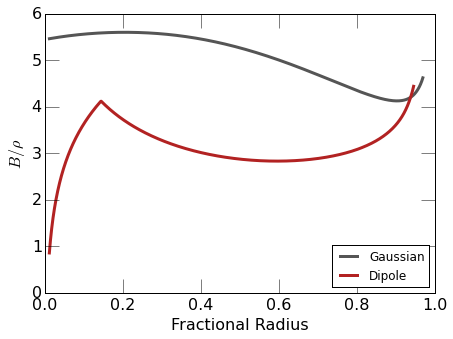

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7., 5.))

ax.tick_params(which='major', axis='both', labelsize=16., length=14.)
ax.set_xlabel('Fractional Radius', fontsize=16.)
ax.set_ylabel('$B / \\rho$', fontsize=16.)

ax.plot(10**(g_grad[:,0] - 10.26), g_mag[:,1] - g_grad[:,1], lw=3, c='#555555', label='Gaussian')
ax.plot(10**(d_grad[:,0] - 10.26), d_mag[:,1] - d_grad[:,1], lw=3, c='#b22222', label='Dipole')
ax.legend(loc=4)

Estimate growth rate of instability, $\tau \propto H_p/v_a$.

In [22]:
Hp = 1.0e10  # rough approximation for deep interior
va_d = 10**d_mag[:,1]/np.sqrt(4.0*np.pi*10**d_grad[:,1])
va_g = 10**g_mag[:,1]/np.sqrt(4.0*np.pi*10**g_grad[:,1])

Plot as a function of depth in the star, based on magnetic field profiles.

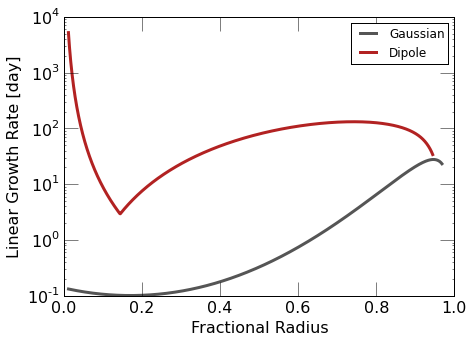

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(7., 5.))

ax.tick_params(which='major', axis='both', labelsize=16., length=14.)
ax.set_xlabel('Fractional Radius', fontsize=16.)
ax.set_ylabel('Linear Growth Rate [day]', fontsize=16.)

ax.semilogy(10**(g_grad[:,0] - 10.26), Hp/va_g/86400., lw=3, c='#555555', label='Gaussian')
ax.semilogy(10**(d_grad[:,0] - 10.26), Hp/va_d/86400., lw=3, c='#b22222', label='Dipole')
ax.legend(loc=1)

Growth of instabilities are slower in the Dipole configuration due to an increase in the Alfvén crossing time resulting from weaker magnetic fields, as compared to the Guassian profile. Instabilities grow rapidly in the deeper interior for the Gaussian profile, on timesales of about 1000 - 10,000 s (hours). In the dipole case, instabilities grow within about 100,000 s (days).

One should also compare the local Alfvén velocity to convective velocities.

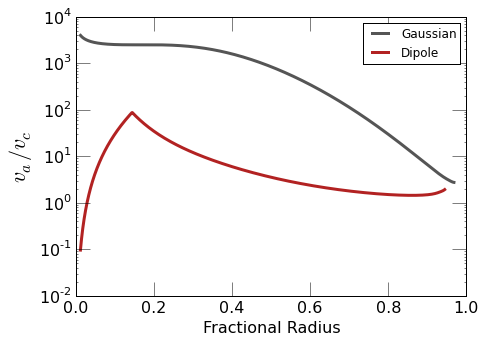

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(7., 5.))

ax.tick_params(which='major', axis='both', labelsize=16., length=14.)
ax.set_xlabel('Fractional Radius', fontsize=16.)
ax.set_ylabel('$v_a / v_c$', fontsize=22.)

ax.semilogy(10**(g_grad[:,0] - 10.26), va_g/g_grad[:,-1], lw=3, c='#555555', label='Gaussian')
ax.semilogy(10**(d_grad[:,0] - 10.26), va_d/d_grad[:,-1], lw=3, c='#b22222', label='Dipole')
ax.legend(loc=1)

Based on our prescriptions, the local Alfvén velocity is always greater than the convective velocity in regions susceptible to instabilities. Therefore, instabilities should not be affected too significantly by the presence of convective modes. There may be coupling of the modes in some regions of the dipole profile model, where $v_a \sim v_c$ at locations between $0.3 < R/R_{\star} 0.6$.